In [204]:
import numpy as np
import sympy as smp
from sympy import *
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

# 1st Year Calculus

In [205]:
x, y = smp.symbols('x y')

In [206]:
f = x**2+y

In [207]:
f.subs(x, 4)

y + 16

In [208]:
smp.sin(x)

sin(x)

In [209]:
smp.log(x, 10)

log(x)/log(10)

In [210]:
# x**(3/2)
x**(smp.Rational(3, 2))

x**(3/2)

## Limits

$$\lim_{x \to \pi} \sin(x/2 + \sin(x)) $$

In [211]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

$$\lim_{x \to 0^+} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [212]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x) + 1), x, 0, dir="+")

2

$$\lim_{x \to 0^-} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [213]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x) + 1), x, 0, dir="-")

0

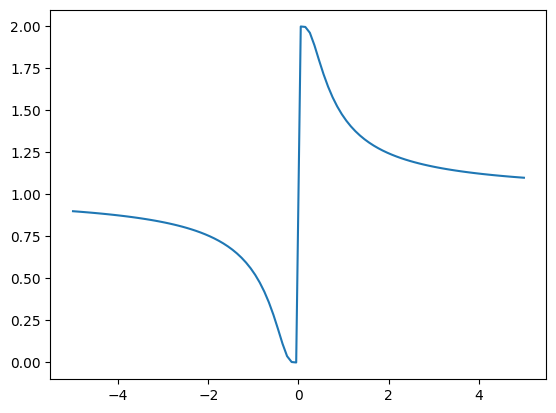

In [214]:
expr = 2*smp.exp(1/x) / (smp.exp(1/x) + 1)
expr_f = smp.lambdify(x, expr)
x_num = np.linspace(-5, 5, 100)
plt.plot(x_num, expr_f(x_num))

$$\lim_{x \to \infty} \frac{\cos(x)-1}{x} $$

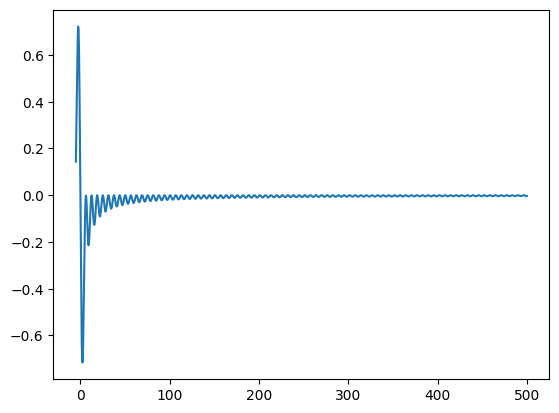

In [215]:
x_num = np.linspace(-5, 500, 1000)
expr_f = lambdify(x, (smp.cos(x) - 1)/x)
plt.plot(x_num, expr_f(x_num))

In [216]:
smp.limit((smp.cos(x) - 1)/x, x, smp.oo)

0

## Derivatives

$$ \frac{d}{dx} \left( \frac{1 + \sin{x}}{1 - \cos{x}} \right)^2 $$

In [217]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} (log_5(x))^{x/2} $$

In [218]:
smp.diff(smp.log(x, 5)**(x/2))

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

$$
\frac{d}{dx} f(x + g(x))
$$

In [219]:
f, g, = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(g)

In [220]:
f

f(g(x))

In [221]:
smp.diff(f, g)

Derivative(f(g(x)), g(x))

In [222]:
smp.diff(f, x)

Derivative(f(g(x)), g(x))*Derivative(g(x), x)

In [223]:
f, g, = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)

In [224]:
f

f(x + g(x))

In [225]:
smp.diff(f, x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## Basic Antiderivatives
$$
\int \csc(x)\cot(x) \,dx
$$



In [226]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

$$
\int 4\sec(3x)\tan(3x) \,dx
$$

In [227]:
smp.integrate(4*smp.sec(3*x)*smp.tan(3*x), x)

4/(3*cos(3*x))

$$
\int \left( \frac{2}{\sqrt{1-x^2}} - \frac {1}{x^{1/4}} \right) \,dx
$$

In [228]:
smp.integrate(2/smp.sqrt(1 - x**2) - 1/x**smp.Rational(1, 4), x)

-4*x**(3/4)/3 + 2*asin(x)

## Initial Value Problems

1. Given $ \frac{dy}{dx} = 8x + csc^2(x)$ with $y(\pi/2) = -7$ solve for $y(x)$

In [229]:
integral = smp.integrate(8*x + smp.csc(x)**2, x)
integral

4*x**2 - cos(x)/sin(x)

$$y = 4x^2 - \frac{cos(x)}{sin(x)} + C$$

Given $y(\pi/2) = - 7$ we have

$$4(\pi/2)^2 - \frac{cos(\pi/2)}{sin(\pi/2)} + C = -7$$

So 

$$C = -7 - 4(\pi/2)^2 - \frac{cos(\pi/2)}{sin(\pi/2)}$$

In [230]:
C = -7 - integral.subs(x, smp.pi/2)
C

-pi**2 - 7

In [231]:
y = integral + C
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

In [232]:
y.subs(x, smp.pi/2)

-7

Definite Integrals
$$
\int_{0}^{\ln(4)} \frac{e^x \,dt}{\sqrt{e^{2x}+9}}
$$

In [233]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$
\int_{1}^{t} x^{10} e^x \,dx
$$

In [234]:
t = smp.symbols('t')

In [235]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Improper Integrals
$$
\int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1 + x^2} \,dx
$$

In [236]:
integrate(16*smp.atan(x) / (1 + x**2), (x, 0, smp.oo))

2*pi**2

## Sequences and Series

In [237]:
n = smp.symbols('n')

$$ \sum_{n = 0}^{\infty} \frac{6}{4^n} $$

In [238]:
smp.Sum(6/4**n, (n, 0, smp.oo))

Sum(6/4**n, (n, 0, oo))

In [239]:
smp.Sum(6/4**n, (n, 0, smp.oo)).doit()

8

$$ \sum_{n = 0}^{\infty} \frac{2^{n+1}}{5^n} $$

In [240]:
smp.Sum(2**(n+1)/5**n, (n, 0, smp.oo)).doit()

10/3

$$ \sum_{n = 1}^{\infty} \frac{\tan^{-1}(n)}{n^{1.1}} $$

In [241]:
smp.Sum(smp.atan(n)/n**smp.Rational(11, 10), (n, 1, smp.oo)).doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

`doit()` doesn't work, can approximate with `n()`

In [242]:
smp.Sum(smp.atan(n)/n**smp.Rational(11, 10), (n, 1, smp.oo)).n()

15.3028821020457

$$ \sum_{n = 1}^{\infty} \frac{1 + cos(n)}{n} $$

In [243]:
smp.Sum((1 + cos(n))/n, (n, 1, smp.oo)).doit()

Sum((cos(n) + 1)/n, (n, 1, oo))

In [244]:
smp.Sum((1 + cos(n))/n, (n, 1, smp.oo)).n()

0.e+2

This is wrong, this series diverges

# 2nd Year Calculus